<a href="https://colab.research.google.com/github/456258zaq/2024_1_Deeplearning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B0%9C%EB%A1%A0_%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C_%EC%9D%B4%EB%B3%91%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# auto arima 용 라이브러리설치
%pip install pmdarima

In [75]:
import requests
import pandas as pd
import numpy as np

# Tiger 코스피 # 기준날짜 : 5월 2일
list_df = [] # 데이터프레임 저장용 리스트 생성
for i in range(1,100): #100페이지까지 조회
  url = f"https://finance.naver.com/item/sise_day.naver?code=277630&page={i}" # 조회용 url 생성
  page = requests.get(url,headers={"User-Agent":
  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}) # request를 위한 header등 셋팅
  list_df.append(pd.read_html(page.text)[0]) # 데이터프레임 리스트에 밀어넣기

In [87]:
Tiger_Kospi_df = pd.concat(list_df) # 데이터 만들기
Tiger_Kospi_df.head() # 날짜 기준 ~ 24년 5월 2일까지의 데이터

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.05.03,27675.0,하락 60,27910.0,28005.0,27675.0,42554.0
2,2024.05.02,27735.0,하락 95,27700.0,27810.0,27625.0,1270.0
3,2024.04.30,27830.0,상승 115,27775.0,27970.0,27775.0,7649.0
4,2024.04.29,27715.0,상승 250,27650.0,27730.0,27540.0,2954.0


In [88]:
Tiger_Kospi_df.dropna(inplace=True) # 인덱스 내 Null 값 제거 (보통 거래일이 없는 경우)
Tiger_Kospi_df.sort_values("날짜",ascending=True,inplace=True) # 날짜의 역순으로 변경 (날짜가 큰것이 제일 뒤로)
Tiger_Kospi_df.set_index("날짜",inplace=True) # 날짜를 index 로
Tiger_Kospi_df.drop(columns=["전일비"],inplace=True) # 전일비의 데이터는 삭제

(990, 5)


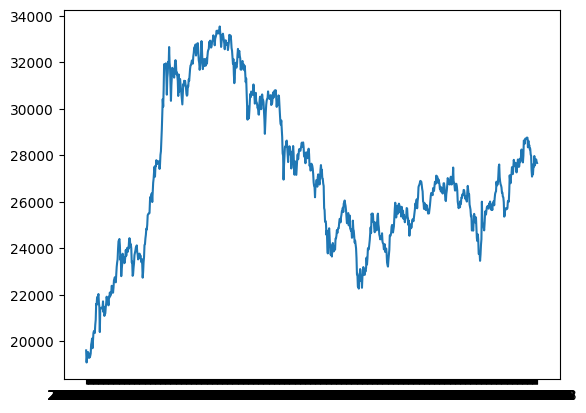

In [90]:
import matplotlib.pyplot as plt # 시각화용 라이브러리
print(Tiger_Kospi_df.shape)
plt.plot(Tiger_Kospi_df["종가"]) # 종가에 대한 예측을 진행할 예정

In [7]:
# 시계열 예측을 위한 모델은 통계적 모델 중 AR, MA, ARMA, ARIMA 등 다양하게 존재함
# 그 외의 딥러닝 계열에서는 RNN, LSTM, GRU, Transformer 등이 존재하며, CNN 활용한 모델 등 다양한 모델들이 있음
# 다만 차이점은 딥러닝의 경우, 장기시계열의 예측이 좋은 경우가 존재하며, ARIMA의 경우 장기예측에서 성능이 떨어지는 경우가 존재함
# 우선, 통계 대표 모델인 ARIMA 의 장기시계열을 예측하여 비교하고 (단변량)
# LSTM 을 기반으로한 장기시계열 예측 (다변량)
# Transformer를 기반으로 한 장기 시계열 예측 (다변량)으로 진행할 계획임

In [8]:
# ARIMA 모델은 과거에 p,q,d 라는 하이퍼파라미터는 직접 수정하면서 테스트 해야 했음
# 참조 : https://dong-guri.tistory.com/9
# p는 AR 모델의 하이퍼 파라미터
# d는 MA 모델의 하이퍼 파라미터
# q는 I 모델의 하이퍼 파라미터임

# AR은 얼마나 전의 데이터를 참고하여, 현재의 기준점을 반영할 것인지에 대한 파라미터
# MA는 이동 평균 (window 방식으로 평균을 내는 방법임)
# I는 차분을 통하여, 데이터의 정상성을 만들고 이를 기반으로 통계모델에 사용할 수 있도록 적합하는 방법임



In [91]:
train_df = Tiger_Kospi_df.iloc[:int(len(Tiger_Kospi_df)*0.8)] # train Set
test_df = Tiger_Kospi_df.iloc[int(len(Tiger_Kospi_df)*0.8):] # test Set

In [92]:
train_df

,종가,시가,고가,저가,거래량
날짜,,,,,
2020.04.29,19610.0,19430.0,19700.0,19430.0,54246.0
2020.05.04,19090.0,19145.0,19305.0,19055.0,242572.0
2020.05.06,19325.0,19280.0,19400.0,19170.0,115387.0
2020.05.07,19410.0,19325.0,19465.0,19310.0,20126.0
2020.05.08,19540.0,19470.0,19630.0,19470.0,595969.0
...,...,...,...,...,...
2023.07.06,26340.0,26625.0,26625.0,26340.0,3910.0
2023.07.07,26090.0,26400.0,26400.0,25950.0,4169.0
2023.07.10,26035.0,26045.0,26185.0,25995.0,964.0


In [93]:
test_df

,종가,시가,고가,저가,거래량
날짜,,,,,
2023.07.13,26720.0,26725.0,26790.0,26585.0,1649.0
2023.07.14,27025.0,26805.0,27040.0,26805.0,8121.0
2023.07.17,26970.0,26855.0,27070.0,26855.0,2443.0
2023.07.18,26790.0,26975.0,27015.0,26765.0,1151.0
2023.07.19,26805.0,26920.0,26965.0,26780.0,2784.0
...,...,...,...,...,...
2024.04.26,27835.0,27770.0,27890.0,27675.0,8969.0
2024.04.29,27715.0,27650.0,27730.0,27540.0,2954.0
2024.04.30,27830.0,27775.0,27970.0,27775.0,7649.0


In [12]:
# auto arima 모델 사용
# 출처 : https://assaeunji.github.io/statistics/2021-09-08-arimapdq/
# 출처 : https://dong-guri.tistory.com/9

In [94]:
# 1차 오토아리마 방법 사용 (보통 AutoML 단위로 돌려서 Baseline 모델을 잡을때 사용함)
import pmdarima as pm
auto_arima_model = pm.auto_arima(train_df["종가"].values,seasonal=True)

In [96]:
test_df["predict"] = auto_arima_model.predict(198)

<ipython-input-96-b9406b779455>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["predict"] = auto_arima_model.predict(198)


[]

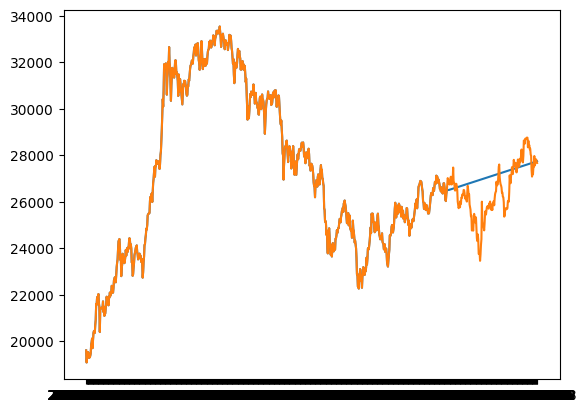

In [97]:
plt.plot(pd.concat([train_df["종가"],test_df["predict"]]))
plt.plot(Tiger_Kospi_df["종가"]) # 종가에 대한 예측을 진행할 예정
plt.plot()

In [98]:
# 직접 변수 변경하면서 Arima 모델링 진행
# 1번은 정상성 만족을 위한 시각화 및 정상성 차수 선정

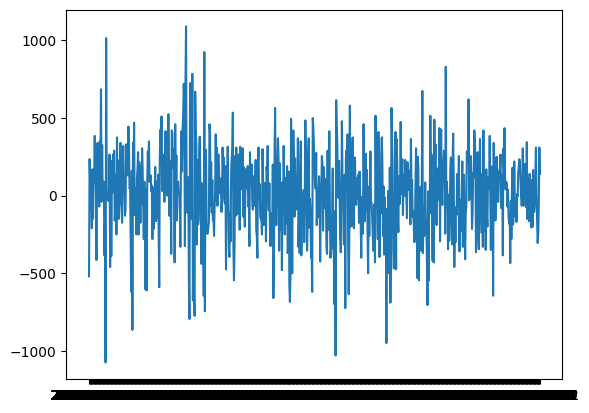

In [99]:
diff_1 = train_df["종가"].diff().dropna()
plt.plot(diff_1)

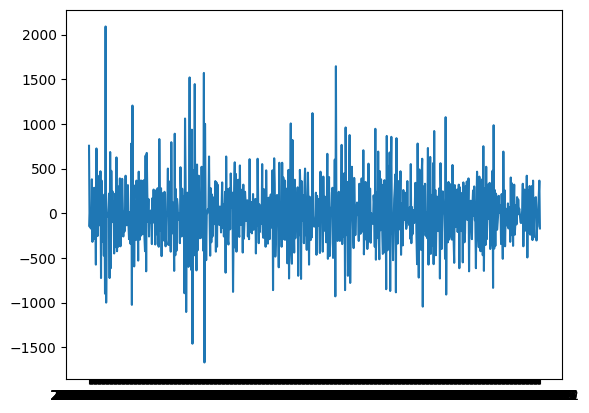

In [100]:
diff_2 = diff_1.diff().dropna()
plt.plot(diff_2)

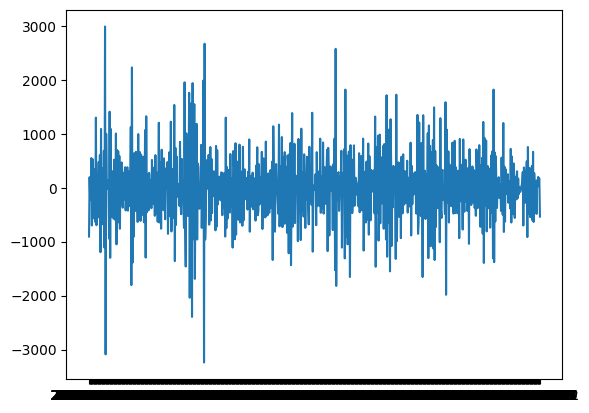

In [101]:
diff_3 = diff_2.diff().dropna()
plt.plot(diff_3)

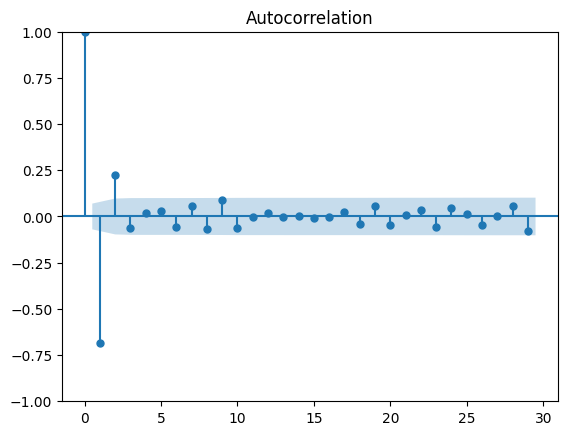

In [105]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(diff_3)
plt.show()
# AR 절단점은 0으로 수렴하는 이후부터로 보므로 4~5로 선정 (하기 케이스의 경우 4로 선정함)

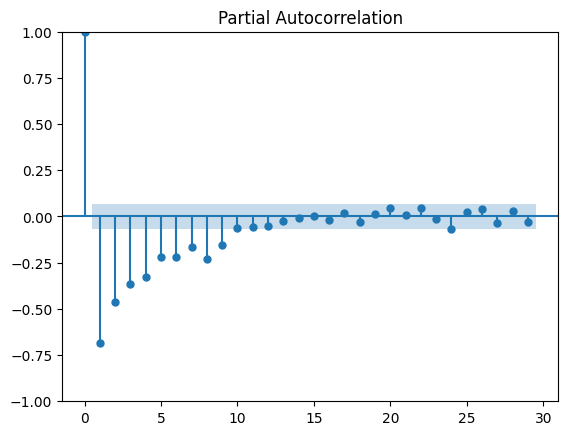

In [106]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_pacf(diff_3)
plt.show()
# 0으로 수렴하는 정도에 따라, MA의 절단점을 찾음 (약 14로 추정함)
# 14정도로 사용

In [107]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train_df["종가"].values,order=(4,4,14))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  792
Model:                ARIMA(4, 4, 14)   Log Likelihood               -5609.949
Date:                Sat, 04 May 2024   AIC                          11257.899
Time:                        01:35:48   BIC                          11346.619
Sample:                             0   HQIC                         11292.005
                                - 792                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.2530      0.036    -89.591      0.000      -3.324      -3.182
ar.L2         -4.5580      0.068    -67.496      0.000      -4.690      -4.426
ar.L3         -3.2386      0.061    -52.800      0.0

In [111]:
test_df["predict"] = model_arima_fit.predict(start=3,end=200)

<ipython-input-111-c30e58c7346a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["predict"] = model_arima_fit.predict(start=3,end=200)


In [112]:
test_df

,종가,시가,고가,저가,거래량,predict
날짜,,,,,,
2023.07.13,26720.0,26725.0,26790.0,26585.0,1649.0,17166.238249
2023.07.14,27025.0,26805.0,27040.0,26805.0,8121.0,19668.143067
2023.07.17,26970.0,26855.0,27070.0,26855.0,2443.0,20321.528355
2023.07.18,26790.0,26975.0,27015.0,26765.0,1151.0,20205.139695
2023.07.19,26805.0,26920.0,26965.0,26780.0,2784.0,19979.517421
...,...,...,...,...,...,...
2024.04.26,27835.0,27770.0,27890.0,27675.0,8969.0,32260.864237
2024.04.29,27715.0,27650.0,27730.0,27540.0,2954.0,32267.087425
2024.04.30,27830.0,27775.0,27970.0,27775.0,7649.0,32075.411539


[]

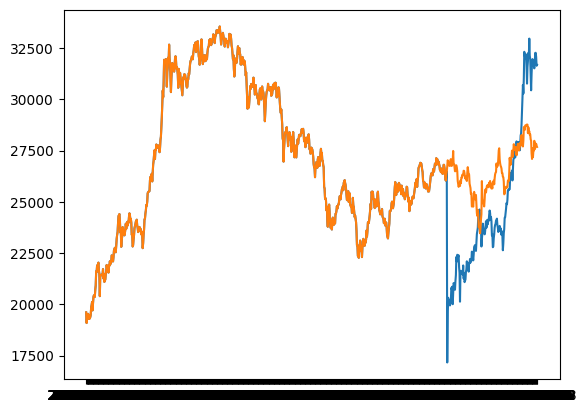

In [113]:
plt.plot(pd.concat([train_df["종가"],test_df["predict"]]))
plt.plot(Tiger_Kospi_df["종가"]) # 종가에 대한 예측을 진행할 예정
plt.plot()

In [23]:
# LSTM 시계열 만들기

In [23]:
# LSTM 의 경우 multilst

In [65]:
# LSTM 참조 : https://www.kaggle.com/code/maryanalyze/simple-lstm-pytorch-time-series-forecasting-model
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from sklearn.metrics import mean_squared_error
import torch.nn.functional as f
from sklearn.preprocessing import MinMaxScaler
import os
import random
import numpy as np

In [63]:
# GPU 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [66]:
# 결과 생성의 동일함을 위하여 SEED 값 설정
SEED = 2024
os.environ["PL_GLOBAL_SEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

In [73]:
# 데이터 전처리
# 데이터는 Longterm예측을 할 것이나, Many - To - One으로 각 time 을 기준을 한칸씩 이동하여 인풋 데이터로 활용할 것임
# 그리고 Multivariate Modeling 을 기준으로 할 것임
n = 5 # 5개씩 자른 데이터를 기준으로 가져감
list_train = []
for i in range(0,len(train_df)-5):
  train_df = train_df.iloc[::-1]
  list_train.append(train_df.iloc[i:i+n])

In [71]:
train_df

,종가,시가,고가,저가,거래량
날짜,,,,,
2024.05.03,27675.0,27910.0,28005.0,27675.0,42554.0
2024.05.02,27735.0,27700.0,27810.0,27625.0,1270.0
2024.04.30,27830.0,27775.0,27970.0,27775.0,7649.0
2024.04.29,27715.0,27650.0,27730.0,27540.0,2954.0
2024.04.26,27835.0,27770.0,27890.0,27675.0,8969.0
...,...,...,...,...,...
2021.02.24,30560.0,31340.0,31415.0,30485.0,4920.0
2021.02.23,31205.0,31105.0,31500.0,30965.0,8865.0
2021.02.22,31430.0,31940.0,31940.0,31300.0,7366.0


In [72]:
list_train[0]

,종가,시가,고가,저가,거래량
날짜,,,,,
2024.05.03,27675.0,27910.0,28005.0,27675.0,42554.0
2024.05.02,27735.0,27700.0,27810.0,27625.0,1270.0
2024.04.30,27830.0,27775.0,27970.0,27775.0,7649.0
2024.04.29,27715.0,27650.0,27730.0,27540.0,2954.0
2024.04.26,27835.0,27770.0,27890.0,27675.0,8969.0


In [ ]:
class LSTM(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers):
    super().__init__()

    self.lstm = nn.LSTM(input_size=input_size, hidden_size = hidden_size,
                        num_layers= num_layers, batch_first = True)
    self.fc = nn.Linear(hidden_size,1)